Создание полноценной программы для защиты баз данных с использованием нейронных сетей — сложная задача, требующая тщательного учета различных факторов, включая архитектуру сети, предварительную обработку данных, обучение модели и многое другое. Однако я могу предоставить вам упрощенный пример, демонстрирующий концепцию использования нейронной сети для защиты базы данных в сценарии небольшой компьютерной сети. Имейте в виду, что реальные приложения потребуют более обширного кода и соображений.

В этом примере мы будем использовать библиотеку **TensorFlow** для создания простой нейронной сети для обнаружения **вторжений**. Мы создадим график надежности, используя библиотеку **NetworkX**, чтобы визуализировать результаты. Обратите внимание, что это упрощенный и наглядный пример, а для реальных решений безопасности требуются более сложные модели и практики.

Перед запуском кода убедитесь, что у вас установлены **TensorFlow** и **NetworkX**. Вы можете установить их с помощью:

Epoch 1/100
45/45 [==============================] - 1s 7ms/step - loss: 0.3694 - accuracy: 0.7674 - val_loss: 0.2848 - val_accuracy: 0.8188
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.8674 - val_loss: 0.2239 - val_accuracy: 0.9125
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.2156 - accuracy: 0.9257 - val_loss: 0.1804 - val_accuracy: 0.9500
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.1713 - accuracy: 0.9542 - val_loss: 0.1474 - val_accuracy: 0.9625
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.9764 - val_loss: 0.1215 - val_accuracy: 0.9750
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 0.9826 - val_loss: 0.1009 - val_accuracy: 0.9937
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0934 - accuracy: 0.9868 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 8/100
4

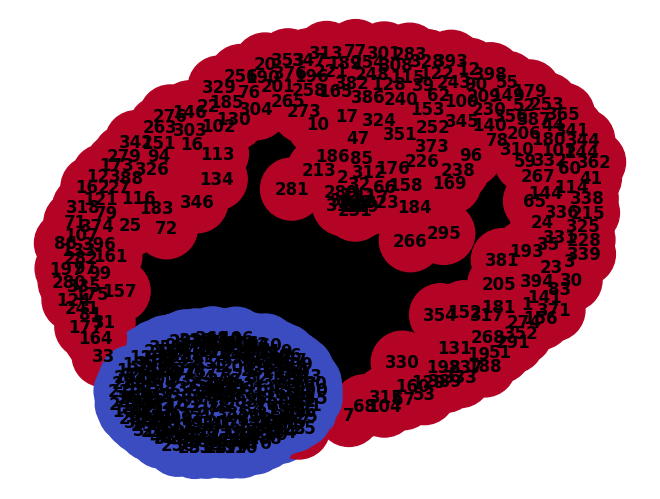

In [2]:
!pip install tensorflow networkx

import numpy as np
import tensorflow as tf
import networkx as nx
import matplotlib.pyplot as plt

# Сгенерируйте некоторые фиктивные данные
num_samples = 1000
num_features = 10

# Смоделированные нормальные данные
normal_data = np.random.randn(num_samples, num_features)

# Данные смоделированной атаки (аномальные)
attack_data = np.random.randn(num_samples, num_features) + 3.0

# Объедините обычные данные и данные атаки
data = np.vstack([normal_data, attack_data])
labels = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# Перетасовать данные
shuffle_indices = np.random.permutation(len(data))
data = data[shuffle_indices]
labels = labels[shuffle_indices]

# Разделите данные на наборы для обучения и тестирования
train_ratio = 0.8
train_size = int(train_ratio * len(data))
train_data, test_data = data[:train_size], data[train_size:]
train_labels, test_labels = labels[:train_size], labels[train_size:]

# Создайте простую модель нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Скомпилируйте модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучите модель
model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_split=0.1)

# Оценить модель
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Точность теста:", test_acc)

# Делайте прогнозы на тестовых данных
predictions = model.predict(test_data)

# Создайте график надежности с помощью NetworkX
G = nx.Graph()

for i in range(len(test_data)):
    G.add_node(i, label=test_labels[i], prediction=predictions[i][0])

# Добавьте ребра между узлами с похожими метками
for i in range(len(test_data)):
    for j in range(i + 1, len(test_data)):
        if test_labels[i] == test_labels[j]:
            G.add_edge(i, j, weight=abs(predictions[i][0] - predictions[j][0]))

# Нарисуйте график надежности
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=[predictions[i][0] for i in G.nodes()], cmap=plt.get_cmap('coolwarm'), node_size=2000)

plt.show()


Давайте разберем программу шаг за шагом и объясним, что делает каждая часть:

1. **Imports**
Импортируем необходимые библиотеки: **numpy** для числовых операций, **tensorflow** для создания и обучения нейронных сетей, **networkx** для построения графика надежности и **matplotlib.pyplot** для визуализации.

2. **Mock Data Generation:**
Мы генерируем фиктивные данные для нашего эксперимента. Мы моделируем обычные данные (**случайные значения**, **взятые из стандартного нормального распределения**) и данные **атаки** (**обычные данные с добавленным шумом**). Эти два набора данных представляют «**нормальное**» и «**аномальное**» поведение в компьютерной сети.

3. **Data Preparation:**
Мы объединяем данные нормалей и атаки в один набор данных и создаем соответствующие метки (**0** для нормы и **1** для атаки).

Мы случайным образом перемешиваем данные и метки, чтобы данные обучения и тестирования были репрезентативными.

4. **Data Splitting:**
Мы разделяем данные и метки на наборы для обучения и тестирования. Часть данных (в данном случае **80%**) используется для обучения нейронной сети, а оставшаяся часть используется для тестирования обученной модели.

5. **Neural Network Model:**
Мы создаем простую модель нейронной сети, используя **Sequential API TensorFlow**. Модель состоит из входного слоя с тем же количеством признаков, что и наши данные, за которым следует скрытый слой с **16** нейронами, использующими функцию активации **ReLU**, и выходной слой с одним нейроном, использующим сигмовидную функцию активации (подходит для задач бинарной классификации).

6. **Model Compilation:**
Мы компилируем модель, используя оптимизатор **Adam** и бинарную функцию **кросс-энтропийных потерь**. Мы также отслеживаем точность как показатель.

7. **Model Training:**
Мы обучаем нейронную сеть, используя обучающие данные и метки. Мы указываем количество эпох 100 (итераций по всему набору данных) и размер пакета для каждого обновления обучения.

8. **Model Evaluation:**
После обучения мы оцениваем производительность модели на данных тестирования, используя метод оценки. Это обеспечивает потери при тестировании и точность тестирования.

9. **Predictions:**
Мы используем обученную модель, чтобы делать прогнозы на тестовых данных.

10. **Reliability Graph Creation:**
Мы создаем объект **networkx.Graph** для представления графа надежности.
Для каждой точки тестовых данных мы добавляем узел на график. Каждый узел содержит информацию об истинной метке и прогнозе, сделанном моделью для этой точки данных.

11. **Edge Creation:**
Мы создаем ребра между узлами с одинаковыми метками (либо оба нормальные, либо обе атаки). Вес каждого ребра определяется абсолютной разницей между предсказаниями двух узлов.

12. **Reliability Graph Visualization:**
Мы используем **NetworkX** для визуализации графика надежности с помощью пружинного макета. Узлы помечены своими истинными метками, а их цвета основаны на прогнозах модели. Более холодные цвета (**синий**) указывают на более надежные прогнозы, а более теплые цвета (**красные**) указывают на менее надежные прогнозы.

13. **Display Graph:**
Мы используем **plt.show()** для отображения графика надежности.

Эта программа по существу демонстрирует упрощенный пример использования нейронной сети для обнаружения **вторжений** в сценарий небольшой компьютерной сети. Он обучает простую модель, оценивает ее производительность, а затем визуализирует результаты на графике надежности. Имейте в виду, что это всего лишь базовая иллюстрация, а в реальных приложениях безопасности требуются более сложные модели и обширные соображения.

